In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import lstsq
from scipy.optimize import fmin
from sklearn.model_selection import train_test_split

In [ ]:
rr = pd.read_csv('Treasury Bill Ratess.csv')

In [ ]:
# Step 1: Compute Y and Z
def compute_Y_Z(data):
    n = len(data)
    Y = np.zeros(n - 1)
    Z = np.zeros((n - 1, 2))

    for i in range(n - 1):
        Y[i] = (data[i + 1] - data[i]) / np.sqrt(np.abs(data[i]))
        Z[i, 0] = 1 / np.sqrt(np.abs(data[i]))
        Z[i, 1] = np.sqrt(np.abs(data[i]))

    return Y, Z

# Step 2: Compute beta_hat
def compute_beta_hat(Y, Z):
    Z_transpose_Z_inv = np.linalg.inv(np.dot(Z.T, Z))
    beta_hat = np.dot(np.dot(Z_transpose_Z_inv, Z.T), Y)
    alpha = -beta_hat[1]
    mu = beta_hat[0]/alpha
    res = [alpha, mu]

    return beta_hat

# Example data (replace this with your actual data)
data = np.array(rr['Interest Rate'])/100
# Compute Y and Z
Y, Z = compute_Y_Z(data)

# Compute beta_hat
res = compute_beta_hat(Y, Z)
# print("params:",res)
# print(res)
def compute_sigma(data, delta_t):
    n = len(data)
    Y, Z = compute_Y_Z(data)
    res = compute_beta_hat(Y, Z)
    residuals = Y-Z.dot(res)
    ms = 1/n *np.sum(residuals**2)
    print(f'MSE:{round(ms*100,4)}%')

    # Step 5: Compute sigma
    sigma_hat = np.linalg.norm(residuals) / np.sqrt(delta_t * n)

    return sigma_hat

# Test the function
# Example data
data = np.array(rr['Interest Rate'])/100

# Example parameters
alpha = -res[1]
mu = res[0]/alpha
delta_t = 1/250  # Replace with your actual time step

# Compute sigma
sigma_hat = compute_sigma(data,delta_t)
# print("Estimated paramms:",list(alpha,mu,sigma_hat))
print(f'Estimated params: [{alpha}, {mu},{sigma_hat}]')

MSE:0.0234%
Estimated params: [0.005857712627913119, 0.11391628538370133,0.2420812869991557]


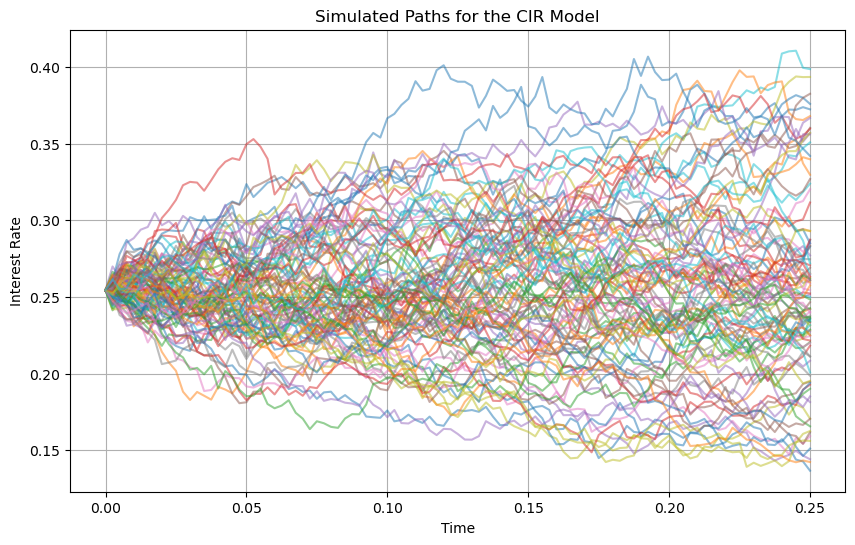

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps):
    dt = T / n_steps
    sqrt_dt = np.sqrt(dt)
    r = np.zeros((n_paths, n_steps+1))
    r[:, 0] = r0

    for i in range(n_steps):
        dW = np.random.normal(0, sqrt_dt, size=(n_paths,))
        r[:, i+1] = r[:, i] + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW

    return r

# Example parameters (replace with your actual values)
kappa = 0.005857712627913119
theta = 0.1139162853837013
sigma = 0.2420812869991557
r0 = (np.array(rr['Interest Rate'])/100)[0]
T = 0.25
n_paths = 100
n_steps = 100
# Simulate paths
paths = simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps)
# print(paths[:5])

# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, n_steps+1), paths[i], alpha=0.5)
plt.title('Simulated Paths for the CIR Model')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(np.linspace(0, T, n_steps), data, alpha=0.5)
# plt.title('Simulated Paths for the CIR Model')
# plt.xlabel('Time')
# plt.ylabel('Interest Rate')
# plt.grid(True)
# plt.show()


In [ ]:


# Assuming your data is stored in variable X
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# X_train contains 80% of your feature data for training
# X_test contains 20% of your feature data for testing
